# Weekly Assignment 03

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# import csv file to pandas df
df = pd.read_csv("data Mashable.csv")
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [3]:
# since the data is in wide form we look at the fields available to pick the variable we want to interpret
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             24999 non-null  int64  
 1   url                            24999 non-null  object 
 2   n_tokens_title                 24999 non-null  int64  
 3   n_tokens_content               24999 non-null  int64  
 4   num_imgs                       24999 non-null  int64  
 5   num_videos                     24999 non-null  int64  
 6   average_token_length           24999 non-null  float64
 7   data_channel_is_lifestyle      24999 non-null  int64  
 8   data_channel_is_entertainment  24999 non-null  int64  
 9   data_channel_is_bus            24999 non-null  int64  
 10  data_channel_is_socmed         24999 non-null  int64  
 11  data_channel_is_tech           24999 non-null  int64  
 12  data_channel_is_world          24999 non-null 

By looking zooming in at the correlations between *shares_log* and the other variables, we decided to pick the variables based on the strenght(relative to the dataset).

In [4]:
df_test = df.corr()
#df_test = df_test[["shares_log"]]
df_test["shares_log"].sort_values(ascending=True)

data_channel_is_world           -0.141932
data_channel_is_entertainment   -0.080967
data_channel_is_bus             -0.033469
weekday_is_wednesday            -0.032125
average_token_length            -0.031730
weekday_is_thursday             -0.030329
weekday_is_tuesday              -0.027738
n_tokens_title                  -0.012247
weekday_is_monday               -0.007843
id                              -0.003900
weekday_is_friday                0.006309
n_tokens_content                 0.032897
data_channel_is_lifestyle        0.036926
num_videos                       0.037147
data_channel_is_tech             0.047729
title_sentiment_polarity         0.050216
global_sentiment_polarity        0.053199
title_subjectivity               0.055161
weekday_is_sunday                0.071864
weekday_is_saturday              0.072644
data_channel_is_socmed           0.085516
num_imgs                         0.085575
global_subjectivity              0.093021
is_weekend                       0

We chose the below variables based on their correlation $ r $ value:
* URL (for later indexing)
* is_weekend: is the day shared a weekend (0.105)
* global_subjectivity: text subjectivity (0.093)
* num_imgs: number of images in an article (0.085)
* data_channel_is_socmed: data channel Social media (0.0855)
* data_channel_is_world: data channel world (-0.141)
* title_subjectivity: Title subjectivity (0.055)
* global_sentiment_polarity: text sentiment polarity (0.050)

the the order mentioned is basically the type of variables and then $r$ value. (eg. data_channel_is_scomed and data_channel_is_world are considered one varibale and that's why they are mentioned consecutively)

In [7]:
df_subset = df[["url", "is_weekend", "global_subjectivity", "num_imgs" , "data_channel_is_socmed", "data_channel_is_world", "title_subjectivity", "shares_log"]]
df_subset.head()

,url,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,data_channel_is_world,title_subjectivity,shares_log
0,http://mashable.com/2013/10/29/ashton-kutcher-...,0,0.439379,12,0,0,0.666667,3.322219
1,http://mashable.com/2014/09/08/mashies-sept-19...,0,0.300454,6,0,1,0.000000,2.437751
2,http://mashable.com/2013/02/01/hello-kitty-roc...,0,0.575486,0,0,0,0.000000,3.176091
3,http://mashable.com/2014/02/06/add-us-on-snapc...,0,0.327220,2,0,0,0.000000,3.301030
4,http://mashable.com/2014/01/07/lindsey-vonn-wi...,0,0.507709,18,0,0,0.000000,3.778151


# Linear Regression

Our hypothesis starts by assuming that the linear regression of our chosen independant variables have a relationship with the *log number of shares* (dependant variable). We will try to model a linear equation to explain the relationship

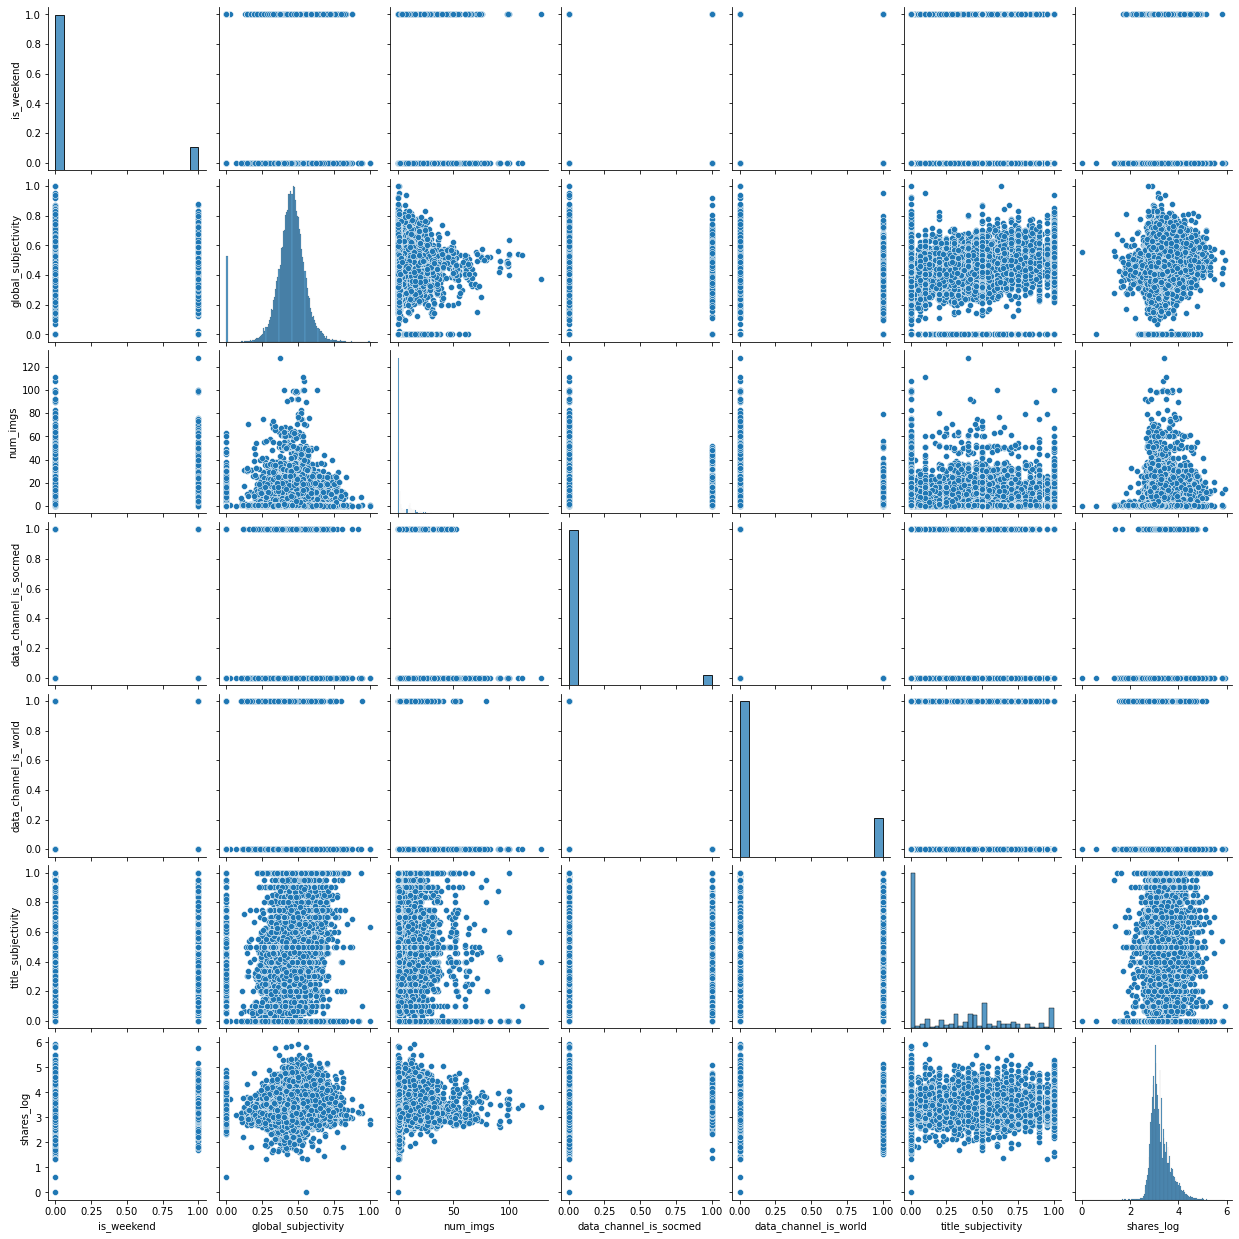

In [6]:
sns.pairplot(df_subset)
plt.show()

After looking at the crossplot,we concluded that the subset selected from the original dataset has some outliers, but they can be explained (eg. an article has +100 images) and therefor we decided not to exclude them from our calculations

Let's look at the correlation in the subset agian

In [29]:
df_subset.corr().sort_values(by = "shares_log")

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,data_channel_is_world,title_subjectivity,shares_log
data_channel_is_world,-0.006276,-0.198923,-0.106978,-0.128047,1.000000,-0.062078,-0.141932
title_subjectivity,0.021418,0.125244,0.056100,-0.013620,-0.062078,1.000000,0.055161
data_channel_is_socmed,-0.001594,0.026838,-0.008554,1.000000,-0.128047,-0.013620,0.085516
num_imgs,0.053317,0.069931,1.000000,-0.008554,-0.106978,0.056100,0.085575
global_subjectivity,0.014754,1.000000,0.069931,0.026838,-0.198923,0.125244,0.093021
is_weekend,1.000000,0.014754,0.053317,-0.001594,-0.006276,0.021418,0.105919
shares_log,0.105919,0.093021,0.085575,0.085516,-0.141932,0.055161,1.000000


We notice that the correlation is relativelty strongest between *shares_log* and *is_weekend* positively and *share_log* and *data_channel_is_world* negatively.

We will try to fit all the data in our model in the next section.

# Training and Fitting

We want to split our data and train our model and then test it.

In [72]:
y = df_subset["shares_log"]
y.index = df_subset["url"]
X = df_subset.loc[:,"is_weekend":"title_subjectivity"]
X.index = df_subset["url"]
X.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,data_channel_is_world,title_subjectivity
url,,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0,0.439379,12,0,0,0.666667
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0,0.300454,6,0,1,0.000000
http://mashable.com/2013/02/01/hello-kitty-rocket/,0,0.575486,0,0,0,0.000000
http://mashable.com/2014/02/06/add-us-on-snapchat/,0,0.327220,2,0,0,0.000000
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0,0.507709,18,0,0,0.000000


We split the data 70-30: 70% to train our model and 30% to test our model with data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,data_channel_is_world,title_subjectivity
url,,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,1,0.451711,0,0,0,0.500000
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0,0.476976,9,0,0,0.100000
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0,0.488495,1,0,0,0.000000
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0,0.545746,23,0,0,0.454545
http://mashable.com/2013/08/28/chef-knife-moves-video/,0,0.507042,13,0,0,0.750000


After we split our data in a 70 (training) and 30 (test) model we create the linear regression instance and we try to identify all the *Coefficient* and *Residual* of the model

In [74]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [75]:
coef = pd.DataFrame(X.columns, lm.coef_)
coef

,0
0.127119,is_weekend
0.202843,global_subjectivity
0.003070,num_imgs
0.111313,data_channel_is_socmed
-0.119065,data_channel_is_world
0.034844,title_subjectivity


We look found the coefficient of our model, now we can find the intercept. 

In [76]:
b0 = lm.intercept_
b0

3.1387635396705615

By looking at the coefficient we can come up with the below analysis:
* Intercept is 3.13, and that is the number of log shares when all our independant variables are set to 0.
* number of images add 0.003 to log shares.
* number of videos add 0.003 to log shares.
* if it is a weekend day then it adds 0.12
* global subjectivity adds 0.25 to log shares.
* goblal sentiment adds 0.11 to log shares.
* title subjectivety adds 0.02 to log shares.
* title sentiment polarity adds 0.05 to log shares.

so we can assume the conclude our Linear Regression Equation of $ y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 .. b_nx_n + e$  where $e$ is the residual would be as follows: 
- __log shares = 3.14 + 0.127 . is weekend + 0.202 . global subjectivity + 0.003 . number of images + 0.111 . data channel is social media - 0.12 . data channel is world + 0.035 . title subjectivety + e__

Now let's calculate the residual $e$

In [78]:
y_test_p = lm.predict(X_test)
e = y_test - y_test_p
e

url
http://mashable.com/2013/04/06/creepy-petman-robot/                       0.162787
http://mashable.com/2014/07/08/nash-grier-vine-slur/                     -0.154088
http://mashable.com/2014/06/06/wwdc-2014-rise-of-the-kits/               -0.109215
http://mashable.com/2014/04/30/mario-kart-8-free-wii-u-game/              0.317526
http://mashable.com/2014/05/28/leaked-emails-evan-spiegel-snapchat/       0.579401
                                                                            ...   
http://mashable.com/2013/11/21/lady-gaga-tap-dance/                      -0.222891
http://mashable.com/2014/05/15/google-apps-message-encryption/           -0.141590
http://mashable.com/2014/04/22/apple-opens-up-os-x-betas-to-all-users/    0.592877
http://mashable.com/2013/06/10/samsung-galaxy-ace-3/                     -0.954250
http://mashable.com/2014/09/04/el-nino-later-weaker/                     -0.246920
Name: shares_log, Length: 7500, dtype: float64

**Now we calculate the $ R^2 $ to see if the model fits**

In [79]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.04477643852441737

We ended up with a $R^2$ value of 0.0447 which means 4.47% of the variation in log shares can be explained by the model. Which is not that good.

Now we calculate our **Rooted Mean Squarred Deviation (RMSD)**

In [80]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39683715472711023

the **RSME** Predicts that we are 0.39 off in our predictions of $log$ shares

The below method did not represent in our opinion the linear regression properly. so we recombined X_test and y_test into a single dataframe to create the model

/Users/fouad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


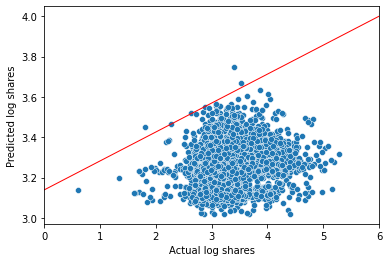

In [92]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual log shares')
plt.ylabel('Predicted log shares')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
#plt.ylim([3,4])
plt.plot([0,6], [b0, 4], color='red', lw=1) #Plot a diagonal length
plt.show()

In [93]:
# df_test is the data frame where we tested our model
df_test = pd.merge(X_test, y_test, on = "url")
df_test["shares_log_p"] = lm.predict(X_test)
df_test["residuals"] = df_test["shares_log"] - df_test["shares_log_p"]
df_test.head(10)

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,data_channel_is_world,title_subjectivity,shares_log,shares_log_p,residuals
url,,,,,,,,,
http://mashable.com/2013/04/06/creepy-petman-robot/,1,0.508973,0,0,0,0.700000,3.556303,3.393516,0.162787
http://mashable.com/2014/07/08/nash-grier-vine-slur/,0,0.493311,1,0,0,0.750000,3.113943,3.268032,-0.154088
http://mashable.com/2014/06/06/wwdc-2014-rise-of-the-kits/,1,0.425864,6,0,0,0.495960,3.278754,3.387969,-0.109215
http://mashable.com/2014/04/30/mario-kart-8-free-wii-u-game/,0,0.535515,19,0,0,0.000000,3.623249,3.305723,0.317526
http://mashable.com/2014/05/28/leaked-emails-evan-spiegel-snapchat/,0,0.528989,1,0,0,0.295960,3.838849,3.259448,0.579401
http://mashable.com/2014/10/13/ferguson-october-photos/,0,0.607234,2,0,0,0.000000,2.968483,3.268077,-0.299594
http://mashable.com/2014/05/17/alex-trebek-90s-rap/,1,0.208383,1,1,0,0.283333,3.869232,3.432407,0.436824
http://mashable.com/2014/08/04/mount-sinai-nyc-ebola/,0,0.491935,14,0,0,0.619048,4.170262,3.303102,0.867159
http://mashable.com/2014/02/18/blog-food-groups/,0,0.497663,1,0,0,0.900000,3.079181,3.274141,-0.194960


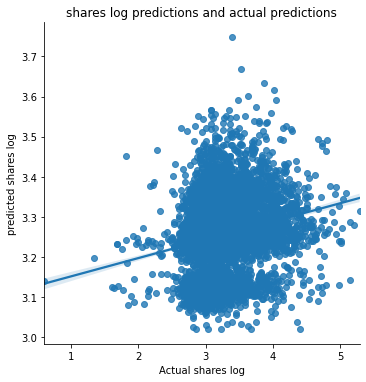

In [94]:
sns.lmplot(x='shares_log', y='shares_log_p', fit_reg=True, data=df_test)
plt.title("shares log predictions and actual predictions")
plt.xlabel("Actual shares log")
plt.ylabel("predicted shares log")
plt.show()

Our model predicted some values but at the same time, was way off. Some articles have been shared in way more than what our model predicts while other times way under.

Now let's plot the *resiudals* in comparison to our actual *shares log*

**First Method**

/Users/fouad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


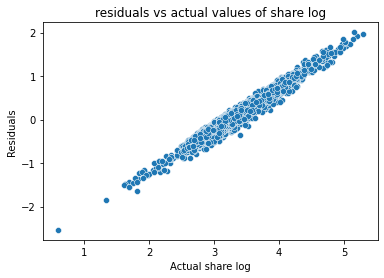

In [101]:
# we can use two methods, plotting using the new df or plotting using y_test and e 
sns.scatterplot(y_test, e)
plt.xlabel('Actual share log')
plt.ylabel('Residuals')
plt.title("residuals vs actual values of share log")
plt.show()

**Second Method**

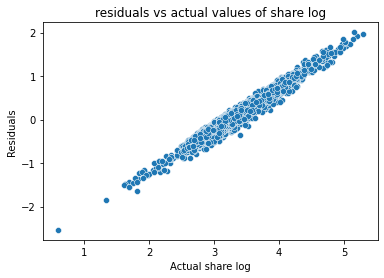

In [102]:
sns.scatterplot(data = df_test, x = "shares_log", y = "residuals")
plt.xlabel('Actual share log')
plt.ylabel('Residuals')
plt.title("residuals vs actual values of share log")
plt.show()

As we can see, both methods have returned the same plot. We can se that the residuals are quiet distributed almost perfectly on a line 